In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('states.csv', header=0)

In [ ]:
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [ ]:
poverty = df[['hs_grad', 'poverty']]
x = poverty['hs_grad']
x = np.array([x[i] for i in range(len(x))])
y = poverty['poverty']
y = np.array([y[i] for i in range(len(y))])


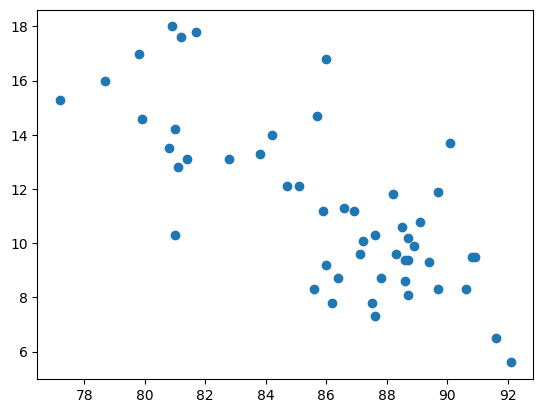

In [ ]:
plt.scatter(x, y)

**Ручной расчет**

In [ ]:
x_s = sum(x) / len(x)
y_s = sum(y) / len(y)
cor = sum((x - x_s) * (y - y_s)) / (sum((x - x_s)**2) * sum((y - y_s)**2))**(1/2) #кореляция
cor

-0.7468582531582505

In [ ]:
n = len(x)
D_x = sum((x - x_s)**2) / (n - 1)
D_y = sum((y - y_s)**2) / (n - 1)
sdx = D_x**(1 / 2)
sdy = D_y**(1 / 2)
b1 = sdy / sdx * cor
b0 = y_s - b1 * x_s

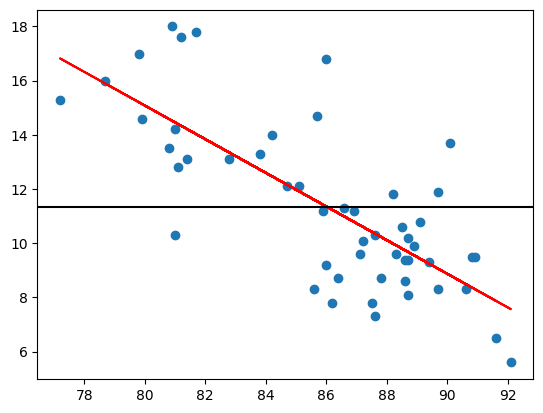

In [ ]:
plt.scatter(x, y)
X = np.array(x)
Y = b0 + b1 * X
plt.plot(X, Y, color='red')
plt.axhline(y=y_s, color='black')

In [ ]:
# детерминация
R = cor**2
R

0.5577972503105934

In [ ]:

SSres = sum((y - Y)**2)
SStotal = sum((y - y_s)**2)
R = 1 - (SSres / SStotal)
R

0.557797250310594

**С помощью библиотек**

In [ ]:
import scipy.stats

In [ ]:
cor = np.corrcoef(x, y)
cor[0][1]

-0.7468582531582506

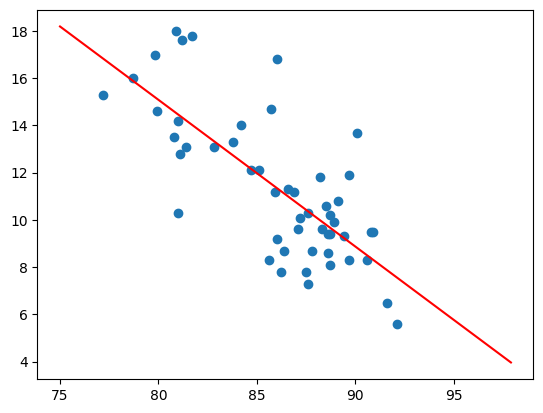

In [ ]:
slope, intercept, r, p, std_err = scipy.stats.linregress(df['hs_grad'], df['poverty'])
plt.scatter(x, y)
X = np.arange(75, 98, 0.1)
Y = intercept + slope * X
plt.plot(X, Y, color='red')

In [ ]:
slope, intercept, r, p, std_err

(-0.6212167177940106,
 64.78096577010209,
 -0.7468582531582505,
 3.10882981031841e-10,
 0.0790164710017928)